In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train_data = pd.read_csv('FMLA1Q1Data_train.csv',header=None)
train_data.head()

,0,1,2
0,0.53767,0.67370,9.7251
1,1.83390,-0.66911,11.1090
2,-2.25880,-0.40032,22.0270
3,0.86217,-0.67180,2.4278
4,0.31877,0.57563,6.5156


In [22]:
# Loading the training data
X_train = train_data.iloc[:, :-1].values  # Features
y_train = train_data.iloc[:, -1].values  # Target

#print(X_train.shape)
#print(y_train.shape)

In [4]:
test_data = pd.read_csv('FMLA1Q1Data_test.csv', header=None)
test_data.head()


,0,1,2
0,0.87060,-0.73016,2.4105
1,0.33076,-0.91633,1.6318
2,-1.34790,1.78760,12.3770
3,1.54790,-0.82040,6.8406
4,-0.61664,-0.19671,1.6138


In [23]:
X_test = test_data.iloc[:, :-1].values  # Features
y_test = test_data.iloc[:, -1].values  # Target
#print(X_test.shape)
#print(y_test.shape)

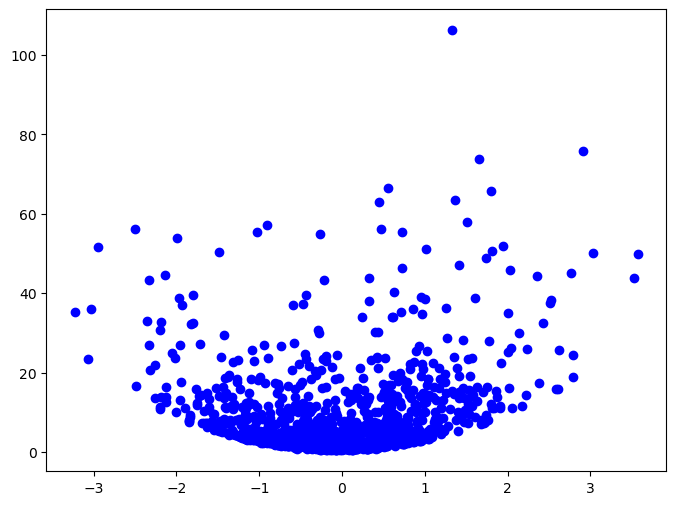

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,[0]],y_train , color='blue', label='Data Points')

##  1. Least Squares Solution:
#### Write a piece of code to obtain the least squares solution wML to the regression  problem using the analytical solution

In [7]:
def least_squares(xtrain,ytrain):
    # w_ML = (X^T X)^(-1) X^T y
    w_ML = np.linalg.inv(xtrain.T @ xtrain) @ xtrain.T @ ytrain
    return w_ML

In [8]:
W_ml = least_squares(X_train,y_train)
print("W_ML =",W_ml)

W_ML = [1.44599914 3.88421178]


## 2.Gradient Descent for Least Squares:

#### Code the gradient descent algorithm with suitable step size to solve the least  squares algorithms and plot ∥wt − wML∥2 as a function of t.

In [9]:
# method for gradient descent function
def gradient_descent(w_ml, alpha=0.01, max_iter=1000):
    m, n = X_train.shape
    w = np.zeros(n)  # Initialize weights
    w_stars = []

    # Gradient descent loop
    for t in range(max_iter):
        # wt+1= wt − η⋅∇ α(wt)
        # ∇ α(wt)= XT(Xwt−y)
        grad = X_train.T @ (X_train @ w - y_train) / m
        w = w - alpha * grad
        w_star = np.linalg.norm(w - w_ml)**2
        w_stars.append(w_star)

    # Plot the convergence
    plt.figure(figsize=(8, 6))
    plt.plot(w_stars)
    plt.xlabel('Iteration (t)')
    plt.ylabel('||w_t - w_ML||^2')
    plt.title('Convergence of Gradient Descent')
    plt.show()
    return w

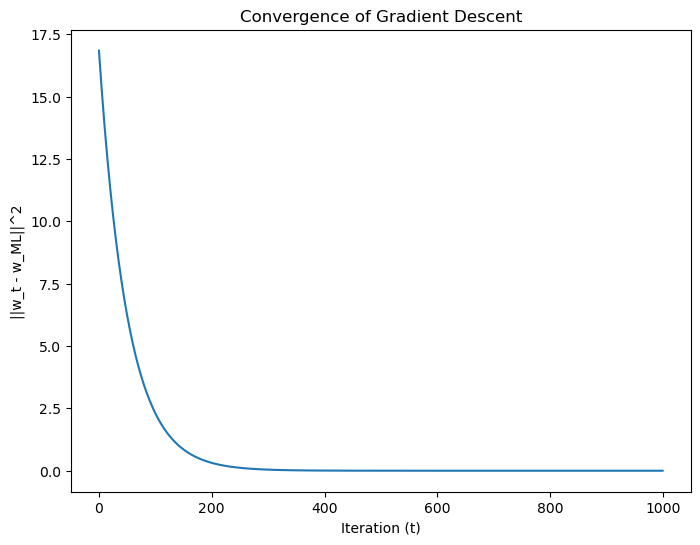

W_GRADIENT = [1.44591695 3.88403219]


In [10]:
# Run gradient descent
w_gradient = gradient_descent(W_ml)
print("W_GRADIENT =",w_gradient)

## 3. Stochastic Gradient Descent (SGD) with Batch Size 100:
####  Code the stochastic gradient descent algorithm using batch size of 100 and plot ∥wt −wML∥2 as a function of t?

In [11]:
def stochastic_gradient_descent(w_ml, batch_size=100, alpha=0.01, max_iter=1000):
    m, n = X_train.shape
    w_sgd = np.zeros(n)
    w_stars_sgd = []

    for t in range(max_iter):
        # Randomly sample a mini-batch
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X_train[indices]
        y_batch = y_train[indices]

        # gradient for the mini-batch
         # wt+1= wt − α⋅∇L mini_batch(wt)
        # ∇α mini_batch(wt)= XT(Xwt−y)
        grad_sgd = X_batch.T @ (X_batch @ w_sgd - y_batch) / batch_size
        w_sgd = w_sgd - alpha * grad_sgd
        w_star_sgd = np.linalg.norm(w_sgd - w_ml)**2
        w_stars_sgd.append(w_star_sgd)

    # Plot the SGD convergence
    plt.plot(w_stars_sgd)
    plt.xlabel('Iteration (t)')
    plt.ylabel('||w_t - w_ML||^2')
    plt.title('Convergence of Stochastic Gradient Descent')
    plt.show()
    return w_sgd



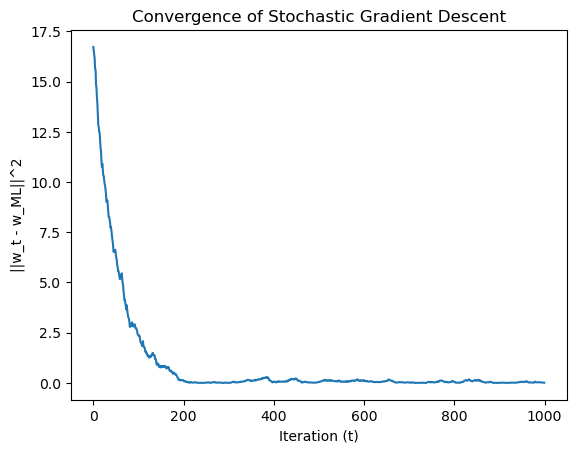

W_SGD = [1.36293024 3.94532779]


In [12]:
w_sgd = stochastic_gradient_descent(W_ml)
print("W_SGD =",w_sgd)


## 4. Ridge Regression with Cross-Validation


In [13]:
def ridge_regression(train_data,lambdas=np.logspace(-8, 5, 100)):
    n = X_train.shape[1]
    validation_errors = []

    for lamda in lambdas:
        # wR=(XT.X+λI)−1 XT.y
        w_ridge = np.linalg.inv(X_train.T @ X_train + lamda * np.eye(n)) @ X_train.T @ y_train
        val_error = np.mean((X_train @ w_ridge - y_train) ** 2)
        validation_errors.append(val_error)

    # Plot validation error vs lambda
    plt.plot(lambdas, validation_errors)
    plt.xscale('log')
    plt.xlabel('Lambda (log scale)')
    plt.ylabel('Validation Error')
    plt.title('Validation Error vs Lambda for Ridge Regression')
    plt.show()

    # Tuning best lambda
    best_lambda = lambdas[np.argmin(validation_errors)]
    #print("Best lambda:", best_lambda)
    return best_lambda


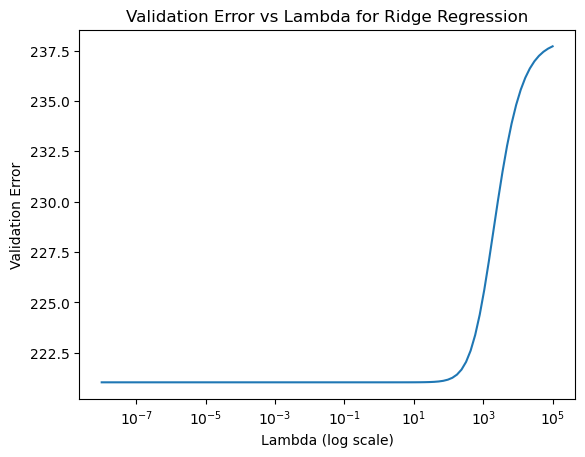

W_RIDGE = [1.44599914 3.88421177]


In [14]:
# Ridge Regression
n = X_train.shape[1]
best_lambda = ridge_regression(train_data)
w_ridge=np.linalg.inv(X_train.T @ X_train + best_lambda * np.eye(n)) @ X_train.T @ y_train
print("W_RIDGE =",w_ridge)

In [15]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [16]:
y_pred_ML = X_test @ W_ml
y_pred_Ridge = X_test @ w_ridge

In [17]:
# comparing test error of w_ML and w_ridge 
mse_ML = mean_squared_error(y_test, y_pred_ML)
mse_Ridge = mean_squared_error(y_test, y_pred_Ridge)

print(f"Test Error (MSE) using w_ML : {mse_ML:.4f}")
print(f"Test Error (MSE) using w_R (Ridge Regression): {mse_Ridge:.4f}")

Test Error (MSE) using w_ML : 142.7661
Test Error (MSE) using w_R (Ridge Regression): 142.7661


## 5. Kernel Regression


In [21]:
import numpy as np
import pandas as pd

# Load the training and test datasets
train_data = pd.read_csv('FMLA1Q1Data_train.csv')
test_data = pd.read_csv('FMLA1Q1Data_test.csv')

# Split into features (X) and target (y)
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Coding Kernel functions to choose the best one which fits the data

def linear_kernel(X1, X2):
    return np.dot(X1, X2.T)

def polynomial_kernel(X1, X2, degree=4, c=1):
    return (np.dot(X1, X2.T) + c) ** degree

def rbf_kernel(X1, X2, sigma=1.0):
    sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-sq_dists / (2 * sigma ** 2))

def sigmoid_kernel(X1, X2, alpha=0.01, c=0):
    return np.tanh(alpha * np.dot(X1, X2.T) + c)

# Kernel Regression from scratch
def kernel_regression(X_train, y_train, X_test, kernel_func, kernel_params=None):
    
    K_train = kernel_func(X_train, X_train) if kernel_params is None else kernel_func(X_train, X_train, **kernel_params) #if kernel has parameters like degree, alpha this stores the params else params=None 
    
    #  (alpha = (K + lambda*I)^-1 * y_train)
    alpha = np.linalg.solve(K_train + 1e-5 * np.eye(len(X_train)), y_train)
    
    # Predict for the test data
    K_test = kernel_func(X_test, X_train) if kernel_params is None else kernel_func(X_test, X_train, **kernel_params)
    y_pred = K_test.dot(alpha)
    
    return y_pred

# Evaluating different kernels
kernels = {
    'linear': linear_kernel,
    'polynomial': (polynomial_kernel, {'degree': 3, 'c': 1}),
    'rbf': (rbf_kernel, {'sigma': 1.0}),
    'sigmoid': (sigmoid_kernel, {'alpha': 0.01, 'c': 0})
}
results={}
for kernel_name, kernel_info in kernels.items():
    if isinstance(kernel_info, tuple):
        kernel_func, kernel_params = kernel_info
    else:
        kernel_func = kernel_info
        kernel_params = None
    
    # Perform kernel regression
    y_pred = kernel_regression(X_train, y_train, X_test, kernel_func, kernel_params)
    
    # Compute the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    results[kernel_name]=mse
    print(f"{kernel_name} kernel MSE: {mse:.4f}")

# Find the kernel with the minimum error
best_kernel = min(results, key=results.get)
print(f'\nBest Kernel: {best_kernel} with MSE = {results[best_kernel]:.4f}')



linear kernel MSE: 144.0475
polynomial kernel MSE: 0.0099
rbf kernel MSE: 0.0524
sigmoid kernel MSE: 134.7538

Best Kernel: polynomial with MSE = 0.0099


linear kernel MSE: 144.0475


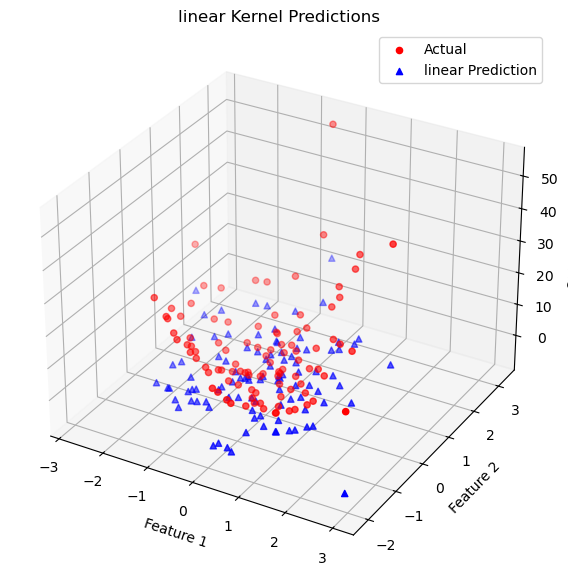

polynomial kernel MSE: 0.0099


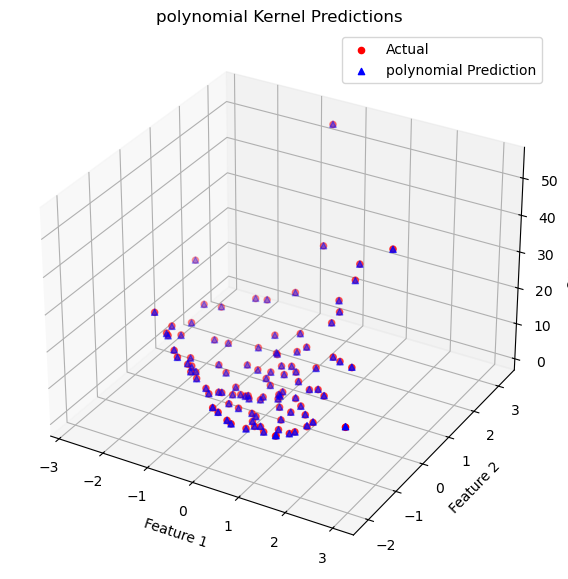

rbf kernel MSE: 0.0524


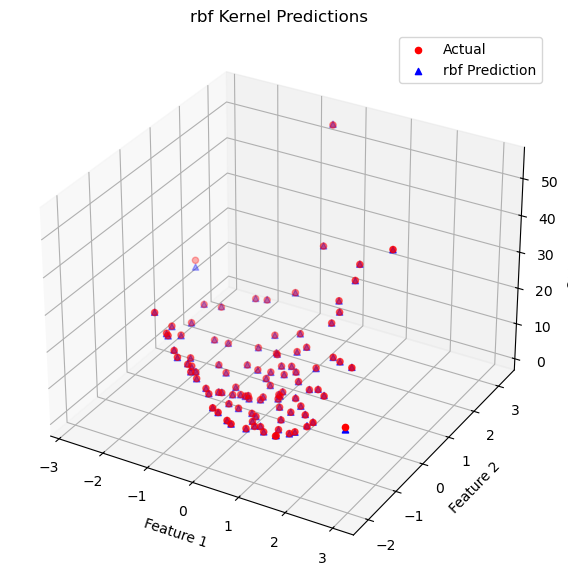

sigmoid kernel MSE: 134.7538


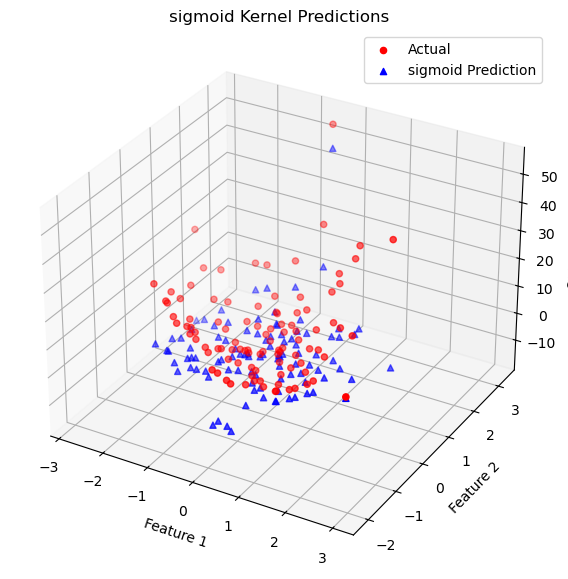

Kernel with Minimum loss is polynomial with loss = 0.009949849236829672


In [33]:
## plotting the kernels for more understanding of the data fit. 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3d plots which makes visualization of the kernels more intutive

# Function to plot the results
def plot_kernel_predictions(X_test, y_test, y_pred, kernel_name):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot test data points
    ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='o', label='Actual')
    
    # Plot predicted surface
    ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='b', marker='^', label=f'{kernel_name} Prediction')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Output (y)')
    ax.set_title(f'{kernel_name} Kernel Predictions')
    ax.legend()
    plt.show()

#  plotting each kernel
min=10e+4
for kernel_name, kernel_info in kernels.items():
    if isinstance(kernel_info, tuple): # kernel_info : kernel parameters like degree ,alpha,sigma stored in tuple 
        kernel_func, kernel_params = kernel_info #If the kernel_info is a tuple, it separates the kernel function and its parameters.
    else:
        kernel_func = kernel_info
        kernel_params = None
    
    # Perform kernel regression
    y_pred = kernel_regression(X_train, y_train, X_test, kernel_func, kernel_params)
    
    # Computing the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{kernel_name} kernel MSE: {mse:.4f}")
    
    if min>mse:
        min=mse
        kernal=kernel_name
    
    # Plot the results
    plot_kernel_predictions(X_test, y_test, y_pred, kernel_name)

print(f"\033[1mKernel with Minimum loss is {kernal} with loss = {min}\033[0m")


##### Basic Observation from above plot:
1. Best kernel which gives minimum MSE for the data : Polynomial Kernel.
2. This prediction for best Kernel seems to be a good prediction as we can observe that the data plotted is in the shape of parabola (2 degree polynomial) So Polynomial kernel with degree 2 or 3 will be a best fit to give least loss.  